# Cleaning 99aana data

# General FAQs
There are a lot of units of measurements used in Nepalese Land Measurements in Nepal. They are 
Ropani Aana Paisa Dam Katha Dhur etc and we convert them in square feet for a general unit of
measurement. 
<br>
Ropani aaana paisa and dam ususally come together or only by themselves or in a combination.
<br>
Katha and dhur usually come together or only by themselves.

In [75]:
import pandas as pd
# pd.set_option('display.max_colwidth', None)

In [76]:
df = pd.read_csv('../csv_files/raw/99aana.csv',encoding='utf-8')

In [77]:
# remove sq m
df['area'] =  df['area'].apply(lambda x: x.split('sq m')[1])
df.head(20)

,title,price,area,location,district,floor,room,bedroom,bathroom,livingroom,kitchen,parking,link
0,"House for Sale at Sitapaila, Kathmandu","25,000,000",0-5-0-0,"Sitapaila, Kathmandu",Kathmandu,3,12,NaN,3,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
1,"House for sale at Lubhu, Lalitpur","14,500,000",0-3-0-0,"Lubhu, Lalitpur",Lalitpur,2.5,7,4,3,NaN,2,1.0,https://99aana.com/property/house-for-sale-at-...
2,"House for sale at Gothatar, Kathmandu","24,400,000",0-4-0-0,"Gothatar, Kathmandu",Kathmandu,2.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
3,"House for sale at TiKathali, Lalitpur","12,500,000",0-3-0-0,"TiKathali, Lalitpur",Lalitpur,1.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
4,"House for Sale at Kadaghari, Kathmandu","13,100,000",0-3-0-0,"Kadaghari, Kathmandu",Kathmandu,2.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
5,"House for Sale at Sitapaila, Kathmandu","35,000,000",0-6-0-0,"Sitapaila, Kathmandu",Kathmandu,2.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
6,"House for sale at Budhanilkantha, Kathmandu","23,500,000",0-4-0-0,"Budhanilkantha, Kathmandu",Kathmandu,2.5,8,NaN,3,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
7,"House for Sale at Budhanilkantha, Kathmandu","21,000,000",0-3-0-0,"Budhanilkantha, Kathmandu",Kathmandu,2.5,8,NaN,3,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
8,"House for sale at Thankot, Chandragiri, Kathmandu","16,500,000",0-3-0-0,"Thankot, Chandragiri, Kathmandu",Kathmandu,2.5,7,NaN,3,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
9,"House for Sale at Duwakot, Bhaktapur","11,500,000",0-5-0-0,"Duwakot, Bhaktapur",Bhaktapur,1.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...


In [27]:
pd.set_option('display.max_rows', None)
#dhur/dhir paisa kattha haat aana daam. This only deals with dashed values eg. 2-4-3-0
# dealing with ropani-aana-paisa-dam first 
def clean_dashed(x):
    area = 0 # in sq feet
    if x.count('-') == 2:
        return None
    if x.count('-') == 3:
        y = x.split('-')
        # converting the splited value into integer
        for i in range(0, len(y)):
            y[i] = float(y[i])
        area = area + 5476 * y[0]   #ropani to sq ft
        area = area + 342.25 * y[1] #aana to sq ft
        area = area + 85.56 * y[2]  #paisa to sq ft
        area = area + 21.39 * y[3]  #dam to sq ft
        area = round(area,2)
        return str(area)
    else:
        return x
df['area'] =  df['area'].apply(clean_dashed)
df.dropna(subset=['area'],inplace = True)

In [28]:
# clean kattha and dhur. This deals with worded values
def clean_katha_and_dhur(x):
    area = 0 # in sq ft
    if x == None:
        return x
    x = x.lower()  # conversion to lowercase to make it convinient if a substring exists in a string.
    # Cleaned spelling mistakes with vscode
    # 1 Katha is equal to 3645 sq ft.
    # 1 Dhur is equal to 182.25 sq ft.
    if 'katha' in x and 'dhur' in x:
        katha = float(x.split('katha')[0].strip())
        dhur = float(x.split('katha')[1].split('dhur')[0].strip())
        area = area + katha * 3645
        area = area + dhur * 182.25

        area = round(area,2)
        return str(area)
        
    if 'katha' in x:
        katha = float(x.split('katha')[0])
        area = area + 3645 * katha
        area = round(area,2)
        return str(area)
    if 'dhur' in x:
        dhur = float(x.split('dhur')[0])
        area = area + dhur * 182.25
        area = round(area,2)
        return str(area)
    return x
df['area'] = df['area'].apply(clean_katha_and_dhur)

In [29]:
# clean ropani aana paisa dam
# 1 Ropani = sq feet
# 1 Aana = 342.25 sq feet
# 1 Paisa = 85.56 sq feet
# 1 Dam = sq feet
# All data containing dam was removed due to easier data cleaning. Now only dealing with aana and paisa
def clean_RAPD(x):
    area = 0
    x = x.lower()
    if 'aana' in x and 'paisa' in x:
        aana = float(x.split('aana')[0].strip())
        paisa = float(x.split('aana')[1].split('paisa')[0].strip())
        area = area + aana * 342.25
        area = area + paisa * 85.56
        area = round(area,2)
        return str(area)
    if 'aana' in x:
        aana = float(x.split('aana')[0].strip())
        area = area + aana * 342.25
        area = round(area,2)
        return str(area)
    return x
    # paisa does not come on it's own so we don't to write code for only paisa data edge case
df['area'] = df['area'].apply(clean_RAPD)


In [30]:
# Cleaning the price
def clean_price(x):
    # rs. and negotiable removed from vscode
    #now remove commas from price and turn it into an integer from string
    x = x.lower()
    x = x.replace(',','')
    x = x.replace('rs','')
    c=0
    l=0
    total = 0 # initializing a variable to converts price in words to integer
    if 'crore' not in x and 'lakh' not in x :
        try:
            x = int(x)
        except:
            x = None
    else:
        if 'crore' in x and 'lakh' in x: #example 2 crore 24 lakh
            c = int(x.split('crore')[0])
            l = int(x.split('crore')[1].split('lakh')[0])
        elif 'lakh' in x and 'crore' not in x:  # example 45 lakh
            l = int(x.split('lakh')[0])
        elif 'crore' in x and 'lakh' not in x : # example 2 crore
            c = int(x.split('crore')[0])
        total = c*10000000 + l*100000
        return total
        
    return x
df['price'] = df['price'].apply(clean_price)

In [31]:
df.head(20)

,title,price,area,location,district,floor,room,bedroom,bathroom,livingroom,kitchen,parking,link
0,"House for Sale at Sitapaila, Kathmandu",25000000.0,1711.25,"Sitapaila, Kathmandu",Kathmandu,3,12,NaN,3,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
1,"House for sale at Lubhu, Lalitpur",14500000.0,1026.75,"Lubhu, Lalitpur",Lalitpur,2.5,7,4,3,NaN,2,1.0,https://99aana.com/property/house-for-sale-at-...
2,"House for sale at Gothatar, Kathmandu",24400000.0,1369.0,"Gothatar, Kathmandu",Kathmandu,2.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
3,"House for sale at TiKathali, Lalitpur",12500000.0,1026.75,"TiKathali, Lalitpur",Lalitpur,1.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
4,"House for Sale at Kadaghari, Kathmandu",13100000.0,1026.75,"Kadaghari, Kathmandu",Kathmandu,2.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
5,"House for Sale at Sitapaila, Kathmandu",35000000.0,2053.5,"Sitapaila, Kathmandu",Kathmandu,2.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
6,"House for sale at Budhanilkantha, Kathmandu",23500000.0,1369.0,"Budhanilkantha, Kathmandu",Kathmandu,2.5,8,NaN,3,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
7,"House for Sale at Budhanilkantha, Kathmandu",21000000.0,1026.75,"Budhanilkantha, Kathmandu",Kathmandu,2.5,8,NaN,3,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
8,"House for sale at Thankot, Chandragiri, Kathmandu",16500000.0,1026.75,"Thankot, Chandragiri, Kathmandu",Kathmandu,2.5,7,NaN,3,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
9,"House for Sale at Duwakot, Bhaktapur",11500000.0,1711.25,"Duwakot, Bhaktapur",Bhaktapur,1.5,NaN,NaN,NaN,NaN,NaN,1.0,https://99aana.com/property/house-for-sale-at-...


In [32]:
df['area'] = df['area'].apply(lambda x: float(x))

In [33]:
df['livingroom'] = pd.to_numeric(df['livingroom'])

In [34]:
df['livingroom'] = df['livingroom'].fillna(0)

In [35]:
df['livingroom'] = df['livingroom'].astype('int64')

In [36]:
df.tail()

,title,price,area,location,district,floor,room,bedroom,bathroom,livingroom,kitchen,parking,link
2058,"House for sale at Golfutar, Kathmandu",29500000.0,1369.00,"Golfutar,Kathmandu","Golfutar,Kathmandu",3.5,14,5,5,0,NaN,NaN,https://99aana.com/property/house-at-golfutar-17/
2059,"House for sale at Boudhha, Kathmandu",25000000.0,1026.75,"Boudhha, Kathmandu",Kathmandu,3.5,12,3,3,0,NaN,NaN,https://99aana.com/property/house-for-sale-at-...
2060,"House for sale at Budhanilkantha, Kathmandu",20000000.0,1026.75,Budhanilkantha,Budhanilkantha,1,5,2,1,0,NaN,NaN,https://99aana.com/property/house-at-budhanilk...
2061,"House for sale at Boudhha, Kathmandu",150000000.0,4877.06,"Bouddha,Kathmandu","Bouddha,Kathmandu",3,40,11,12,0,NaN,NaN,https://99aana.com/property/house-for-sale-at-...
2062,"House for sale at Sukedhara, Kathmandu",43500000.0,3080.25,"Sukedhara, Kathmandu",Kathmandu,3.5,NaN,NaN,NaN,0,NaN,NaN,https://99aana.com/property/house-for-sale-at-...


In [37]:
df.isnull().sum()

title           0
price           3
area            0
location        0
district        0
floor           0
room          246
bedroom       641
bathroom      296
livingroom      0
kitchen       966
parking       450
link            0
dtype: int64

In [38]:
df['kitchen'] = pd.to_numeric(df['kitchen'],errors='coerce')
df['floor'] = pd.to_numeric(df['floor'],errors='coerce')
df['room'] = pd.to_numeric(df['room'],errors='coerce')
df['bedroom'] = pd.to_numeric(df['bedroom'],errors='coerce')
df['bathroom'] = pd.to_numeric(df['bathroom'],errors='coerce')


In [39]:
# Droping rows with empty rooms and price
df.dropna(axis = 0 ,subset = ['room'],inplace=True)
df.dropna(axis = 0 ,subset = ['price'],inplace=True)
df.dropna(axis = 0 ,subset = ['floor'],inplace=True)


In [40]:
df.head()

,title,price,area,location,district,floor,room,bedroom,bathroom,livingroom,kitchen,parking,link
0,"House for Sale at Sitapaila, Kathmandu",25000000.0,1711.25,"Sitapaila, Kathmandu",Kathmandu,3.0,12.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
1,"House for sale at Lubhu, Lalitpur",14500000.0,1026.75,"Lubhu, Lalitpur",Lalitpur,2.5,7.0,4.0,3.0,0,2.0,1.0,https://99aana.com/property/house-for-sale-at-...
6,"House for sale at Budhanilkantha, Kathmandu",23500000.0,1369.00,"Budhanilkantha, Kathmandu",Kathmandu,2.5,8.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
7,"House for Sale at Budhanilkantha, Kathmandu",21000000.0,1026.75,"Budhanilkantha, Kathmandu",Kathmandu,2.5,8.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...
8,"House for sale at Thankot, Chandragiri, Kathmandu",16500000.0,1026.75,"Thankot, Chandragiri, Kathmandu",Kathmandu,2.5,7.0,NaN,3.0,0,NaN,1.0,https://99aana.com/property/house-for-sale-at-...


In [41]:
# Removing outliers.
df = df[ df['room'] < 17 ]


In [42]:
df['pp_sqft'] = df['price'] / df['area']
df['pp_sqft'].head(10)

0     14609.203798
1     14122.230338
6     17165.814463
7     20452.885318
8     16070.124178
10    18018.018018
11    14122.230338
12    13148.283419
13    21548.575603
14      329.218107
Name: pp_sqft, dtype: float64

<AxesSubplot:xlabel='area', ylabel='price'>

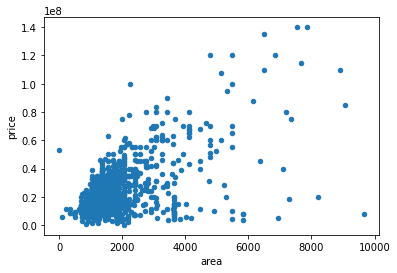

In [67]:
import matplotlib.pyplot as plt
df['location'].count()
df1 = df[ (df['price'] < 150000000) & (df['area'] < 10000) ]

X = df1['area']
Y = df1['price']

df1.plot.scatter(x='area',y='price')

<AxesSubplot:xlabel='room', ylabel='price'>

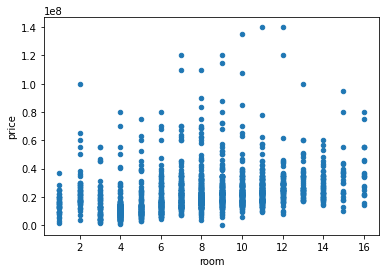

In [73]:
df1.plot.scatter(x='room',y='price')

In [44]:
from sklearn.model_selection import train_test_split
X = df.drop(['price','title','location','district','bedroom','bathroom','livingroom','kitchen','parking','link','pp_sqft'],axis='columns')
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)
X.head()


,area,floor,room
0,1711.25,3.0,12.0
1,1026.75,2.5,7.0
6,1369.00,2.5,8.0
7,1026.75,2.5,8.0
8,1026.75,2.5,7.0


In [45]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

-1.4330633219565443